In [4]:
# Problem 1
import numpy as np
import pandas as pd
s1=np.zeros(26)
s2=np.zeros(26)
j=0
for i in range(51):
    if i%2==0:
        s2[j]=i
        j=j+1
s1=s2*s2-1

for i in range(26):
    if s2[i]%3==0:
        s1[i]=0
S=pd.Series(s1, index=s2)
S

0.0        0.0
2.0        3.0
4.0       15.0
6.0        0.0
8.0       63.0
10.0      99.0
12.0       0.0
14.0     195.0
16.0     255.0
18.0       0.0
20.0     399.0
22.0     483.0
24.0       0.0
26.0     675.0
28.0     783.0
30.0       0.0
32.0    1023.0
34.0    1155.0
36.0       0.0
38.0    1443.0
40.0    1599.0
42.0       0.0
44.0    1935.0
46.0    2115.0
48.0       0.0
50.0    2499.0
dtype: float64

In [54]:
# Problem 2
from matplotlib import pyplot as plt
def prob(p):
    b=np.random.binomial(1,p=p)
    if b==0:
        d=-1
    else:
        d=1
    return d
def f(p,d=100):
    a=pd.date_range("1/1/2000","12/31/2000",freq='D')
    c=np.zeros(len(a))
    c[0]=d
    for i in range(1,len(a)):
        c[i]=prob(p)+c[i-1]
    S=pd.Series(c,a)
    plt.plot(a,c)
    plt.show()

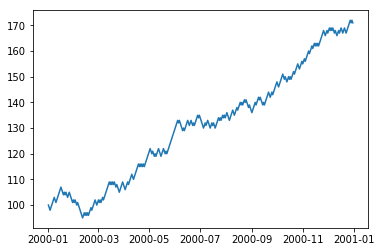

In [59]:
f(0.6,100)

In [6]:
# Problem 3
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age,'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [76]:
studentInfo[(studentInfo['Sex']=='M')&(studentInfo['Age']>19)][['ID','Name']]

,ID,Name
0,0,Mylan
6,6,Matt


In [7]:
#Problem 4

df = pd.merge(studentInfo[studentInfo['Sex']=='M'] ,otherInfo, on='ID')[['ID','Age','GPA']]
df = df[df['Age']>19]
df

,ID,Age,GPA
0,0,20,3.8
3,6,20,3.8


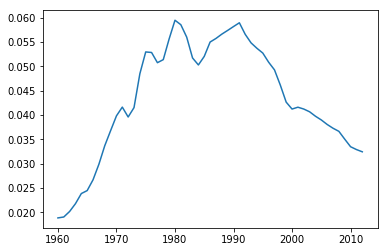

5 years with the highest crime rate:  1980 1991 1981 1990 1989
average number of total crimes:  10638068.075471697
average number of burglary crimes:  2446286.2075471696
years for which the total number of crimes was below average, but the number of burglaries was above average:  [1973, 1974]


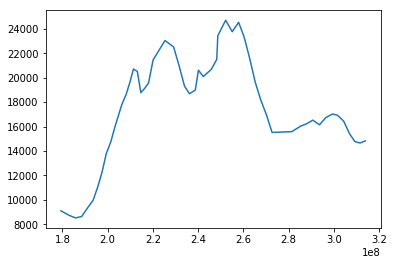

In [56]:
# Problem 5
import pandas as pd
from matplotlib import pyplot as plt
x=pd.read_csv('crime_data.csv',header=1,index_col=0)
x['crime rate']=x['Total']/x['Population']
plt.plot(x.index,x['crime rate'])
plt.show()
df=x.sort_values('crime rate',ascending=False)
print("5 years with the highest crime rate: ",df.index[0],df.index[1],df.index[2],df.index[3],df.index[4])
print("average number of total crimes: ",x['Total'].mean())
print("average number of burglary crimes: ", x['Burglary'].mean())
df2=x[(x['Total']<x['Total'].mean())&(x['Burglary']>x['Burglary'].mean())]
print("years for which the total number of crimes was below average, but the number of burglaries was above average: ",list(df2.index))
plt.plot(x['Population'],x['Murder'])
plt.show()
df3=x.reindex(index=x.index[21:30],columns=['Population','Violent','Robbery'])
df3.to_csv("crime_subset.csv")






In [25]:
x

,Population,Total,Violent,Property,Murder,Forcible-Rape,Robbery,Aggravated-assault,Burglary,Larcency-Theft,Vehicle-Theft,crime rate
Year,,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,0.018872
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,0.019061
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,0.020198
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,0.021803
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,0.023881
1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900,0.024490
1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200,0.026708
1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800,0.029897
1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600,0.033702


In [ ]:
# Problem 6
